In [1]:
import warnings
warnings.filterwarnings('ignore')

주성분 분석(Principal_Component_Analysis)이란 고차원의 데이터를 저차원의 데이터로 축소하는 알고리즘을 말한다.  
주로 고차원의 데이터를 3차원 이하의 데이터로 바꿔서 시각화 하는데 많이 사용되며, 유용한 정보만 살려서 적은 메모리에 저장하거나 데이터의 노이즈를 줄이고 싶을 때도 사용되는 알고리즘이다.
***
주성분 분석의 특징은 데이터의 분산을 최대한 유지하면서 저차원으로 데이터를 변환하는 데 있다. 분산을 유지하는 이유는 데이터의 고유한 특성을 최대한 유지하기 위해서이다.

식습관 데이터를 차원축소시켜서 시각화 하기

데이터 획득  
사람들의 하루 식습관 데이터를 만든 후 주성분 분석을 사용해 시각화하기 위해서 칼로리, 아침, 점심, 저녁, 운동 횟수, 체형이라는 특징을 가진 데이터프레임을 생성한다.

In [4]:
import pandas as pd
df = pd.DataFrame(columns = ['calorie', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']
df

,calorie,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


데이터 전처리  
데이터 전처리 과정을 통해 범위가 제각각인 특징을 표준화 한다.  
가공 데이터에 데이터의 특징과 레이블(클래스)가 함께 있으므로 데이터의 특징으로만 구성된 X 데이터프레임을 만든다.

In [6]:
X = df[['calorie', 'breakfast', 'lunch', 'dinner', 'exercise']]
X

,calorie,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


표준화  
위 데이터 전처리 결과를 통해 칼로리가 유난히 다른 특성들에 비해 수치의 범위가 큰 것을 확인할 수 있다.  
수치가 큰 칼로리와 다른 특성들은 우리가 눈으로 비교할 수 없듯이 머신러닝 모델도 쉽게 비교하기 힘들어한다.  
이 경우 모든 특성들을 평균이 0이고 표준편자가 1인 데이터로 바꾼 후 비교하면 특성들의 상관관계를 이해하기 쉬워지고 머신러닝 모델역시 더욱 효율적으로 데이터를 학습할 수 있다.

In [7]:
# 평균을 0, 분산을 1로 조정해서 표준화를 위해 StandardScaler를 import 한다.
from sklearn.preprocessing import StandardScaler

In [8]:
# 칼로리를 포함한 모든 특성을 같은 범위내로 표준화 한다.
x_std = StandardScaler().fit_transform(X)
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

레이블 분리하기  
각 데이터 특성에 따른 레이블(체형)을 따로 Y 데이터프레임으로 생성한다.

In [9]:
Y = df[['body_shape']]
Y

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


공분산 행렬 구하기  
주성분 분석을 하기 위해 가장 먼저 할 일은 특징들의 공분산 행렬을 구하는 것이다.

In [10]:
import numpy as np
features = x_std.T
# np.cov() 메소드를 사용하면 x의 분산, y의 분산과 함께 x와 y의 공분산을 계산한다.
covariance_matrix = np.cov(features) # 공분산 계산
covariance_matrix

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

고유값과 고유벡터 구하기  
공분산 행렬에서 가장 큰 고유값을 가진 고유벡터를 찾아 그 벡터 위에 데이터를 사영시킨다.  
사영시킨다는 의미는 데이터의 손실을 최소한으로 하는 1차원 공간으로 축소한다는 의미이다.

In [13]:
# 공분산 행렬에서 고유값과 고유벡터를 계산한다.
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('고유값 \n{}\n 고유벡터 \n{}'.format(eig_vals, eig_vecs))
# 가장 큰 고유벡트로 데이터를 사영할 경우 얼마만큼의 정보가 유지되는지 확인한다.
for i in range(len(eig_vals)):
    print(eig_vals[i] / sum(eig_vals))

고유값 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]
 고유벡터 
[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]
0.7318321731427545
0.1509761705671509
0.01373316793695013
0.04996542317586186
0.05349306517728263


결과를 통해 1차원 데이터로 차원 축소를 하더라도 73% 정도에 해당되는 정보를 유지할 수 있다는 사실을 할 수 있다. 27% 정도의 정보 손실을 감안하고 1차원 데이터로 축소한다.

5차원 데이터를 고유벡터로 사영시킨다.

In [15]:
projected_X = x_std.dot(eig_vecs.T[0]) / np.linalg.norm(eig_vecs.T[0])
projected_X

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

시각화  
데이터가 사영된 고유벡터(주성분)를 x축으로 하고 1차원 데이터이므로 y축은 0으로 통일시킨다.  
데이터를 쉽게 이해하기 위해 클래스를 마지막 컬럼으로 포함시킨다.

In [23]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y
result

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


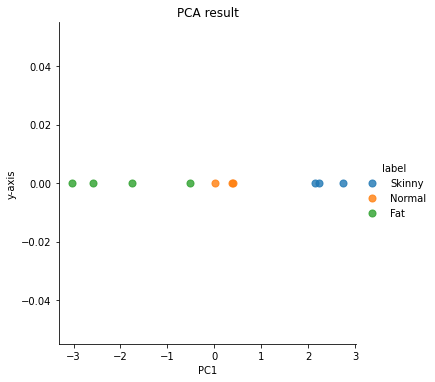

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.lmplot(x='PC1', y='y-axis', data=result, fit_reg=False, hue='label', scatter_kws={'s': 50})
plt.title('PCA result')
plt.show()

sklearn을 이용한 주성분 분석 간단 구현  
사이킷런 라이브러리를 사용하면 단 몇줄만으로 간단하게 주성분 분석을 구현할 수 있다.  
다음과 같은 주성분 분석 라이브러리를 사용해 5차원 데이터를 1차원으로 아주 간단히 축소할 수 있다.

In [28]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)

In [29]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y
sklearn_result

,PC1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


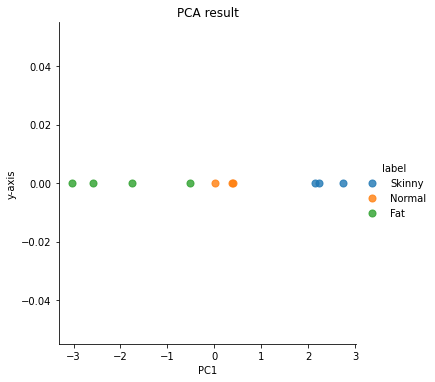

In [32]:
sns.lmplot(x='PC1', y='y-axis', data=result, fit_reg=False, hue='label', scatter_kws={'s': 50})
plt.title('PCA result')
plt.show()